In [2]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_26300\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('timestampplayers.csv')
df = pd.read_csv('playersNball.csv')
df

,id,teamId,frame,x,y,ball_posession,timestamp,ball_x,ball_y
0,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,29,-1,0,0.00,18,73
1,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,46,55,0,0.00,18,73
2,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,51,49,0,0.00,18,73
3,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,54,75,0,0.00,18,73
4,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,0,32,37,0,0.00,18,73
...,...,...,...,...,...,...,...,...,...
33049,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,20,60,0,24.14,1,41
33050,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Green,1660,23,49,0,24.14,1,41
33051,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,35,40,0,24.14,1,41
33052,4de6fcdc-5850-41e8-8e22-bf2dec5c8559,Red,1660,18,55,0,24.14,1,41


In [4]:
# Initialize lists to store x and y points
xpoints = []
ypoints = []
ts=[]
team=[]
c=0
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        
        # Append x and y points
        xpoints.append(ball_pos_x)
        ypoints.append(ball_pos_y)
        team.append(row['teamId'])
        ts.append(row['timestamp'])
        
# Create DataFrame df_pressure
df_heatmap = pd.DataFrame({
    "x_Point": xpoints,
    "y_Point": ypoints,
    "Team": team,
    "TimeStamp": ts
})
print(df_heatmap)


     x_Point  y_Point  Team  TimeStamp
0         30       81   Red       0.00
1         30       80   Red       0.00
2         29       80   Red       0.03
3         29       80   Red       0.05
4         29       79  Blue       0.07
..       ...      ...   ...        ...
716       33       41  Blue      21.81
717       33       41  Blue      21.89
718       30       46  Blue      22.32
719       29       46  Blue      22.51
720       29       45  Blue      22.52

[721 rows x 4 columns]


In [5]:
df_heatmap['Team'].value_counts()

Team
Blue    474
Red     247
Name: count, dtype: int64

In [6]:
#do tosql

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

In [9]:
#find maxium ycoordinate in both starting and ending point in df_fin
max_y = df_heatmap['y_Point'].max()
max_y
over= max_y-80

In [10]:
df_heatmap['y_Point'] = df_heatmap['y_Point']-over

C:\Users\hamza\AppData\Local\Temp\ipykernel_26300\245993872.py:56: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_heatmap['x_Point'], y=df_heatmap['y_Point'], shade=True,n_levels=50)
C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

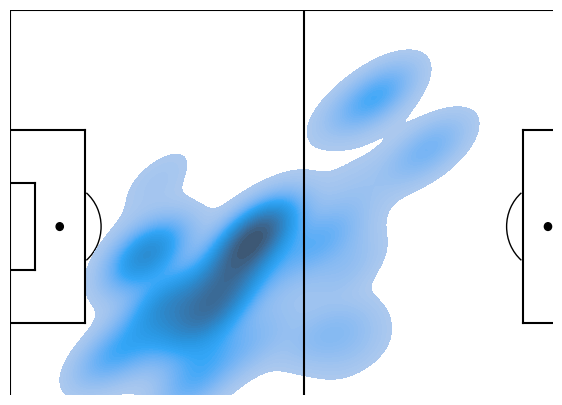

In [11]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="black")
plt.plot([0,130],[90,90], color="black")
plt.plot([130,130],[90,0], color="black")
plt.plot([130,0],[0,0], color="black")
plt.plot([65,65],[0,90], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="black")
plt.plot([0,16.5],[65,65],color="black")
plt.plot([16.5,0],[25,25],color="black")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="black")
plt.plot([113.5,113.5],[65,25],color="black")
plt.plot([113.5,130],[25,25],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="black")
plt.plot([5.5,5.5],[54,36],color="black")
plt.plot([5.5,0.5],[36,36],color="black")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="black")
plt.plot([124.5,124.5],[54,36],color="black")
plt.plot([124.5,130],[36,36],color="black")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(x=df_heatmap['x_Point'], y=df_heatmap['y_Point'], shade=True,n_levels=50)
plt.xlim(0, 120)
plt.ylim(80, 0)  # Reverse the y-axis


#Display Pitch
plt.show()